<a href="https://colab.research.google.com/github/kiuugi/pandas/blob/main/07_Combine_1)_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

## concat

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

* 두 데이터 프레임을 연결해서 하나의 데이터프레임으로 만들 수 있음
* 두 데이터 프레임을 위/아래 또는 왼쪽/오른쪽으로 연결하기만 함
* pd.concat([데이터프레임1, 데이터프레임2])

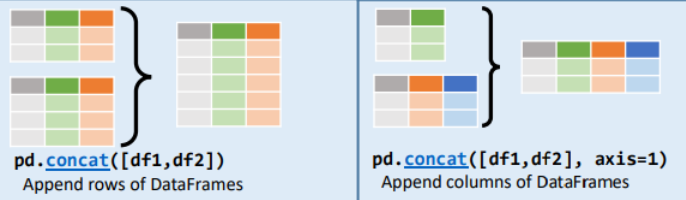

In [2]:
import pandas as pd

In [3]:
pd.concat?

### [실습1] Series 데이터

In [4]:
s1 = pd.Series(['a','b'])
s2 = pd.Series(['c','d'])

In [5]:
# 기본 연결방식 : 위아래 axis=0
pd.concat([s1,s2])

0    a
1    b
0    c
1    d
dtype: object

In [8]:
# 기존의 쓰고있던 인덱스 무시
pd.concat([s1,s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [9]:
# keys : 계층적 인덱스
pd.concat([s1,s2],keys=['s1','s2'])

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

In [10]:
# keys 값과 ignore_index는 같이 쓰면 의미가 없음
pd.concat([s1,s2], keys=['s1','s2'], ignore_index=True)
# ignore_index=True 이것만 적용됨

0    a
1    b
2    c
3    d
dtype: object

In [11]:
# 컬럼명을 주고 싶다면? names 속성
pd.concat([s1,s2],keys=['s1','s2'], names=['Series name', 'Row Id'])


Series name  Row Id
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

### [실습2] 데이터프레임

In [12]:
# 결합할 데이터로드

df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "customer_id": [1, 2, 3],
    "customer_name": [
        "Robert",
        "Peter",
        "Dave",
    ],
})
df1

,id,customer_id,customer_name
0,1,1,Robert
1,2,2,Peter
2,3,3,Dave


In [13]:
df2 = pd.DataFrame({
    "id": [1, 2, 4],
    "order_id": [100, 200, 300],
    "order_date": ["2021-01-21", "2021-02-03", "2020-10-01"]
})

df2

,id,order_id,order_date
0,1,100,2021-01-21
1,2,200,2021-02-03
2,4,300,2020-10-01


In [15]:
# 기본 형태로 연결
pd.concat([df1, df2])

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,NaN,NaN
1,2,2.0,Peter,NaN,NaN
2,3,3.0,Dave,NaN,NaN
0,1,NaN,NaN,100.0,2021-01-21
1,2,NaN,NaN,200.0,2021-02-03
2,4,NaN,NaN,300.0,2020-10-01


In [17]:
# 축을 지정하여 연결하기
# axis : 0(디폴트) 위 -> 아래
#        1 왼쪽 -> 오른쪽

pd.concat([df1, df2], axis=1)

,id,customer_id,customer_name,id,order_id,order_date
0,1,1,Robert,1,100,2021-01-21
1,2,2,Peter,2,200,2021-02-03
2,3,3,Dave,4,300,2020-10-01


In [19]:
l1 = {
    "name": ["John", "Nate", "Fred"],
    "job": ["teacher", "student", "developer"]
}
l2 = {
    "name": ["Ed", "Jack", "Ted"],
    "job": ["dentist", "farmer", "designer"]
}
l3 = {
    "name": ["John", "Nate", "Fred"],
    "job": ["teacher", "student", "developer"]
}
l4 = {
    "age": [25, 30, 45],
    "country": ["U.S", "U.K", "Korea"]
}

df1 = pd.DataFrame(l1)
df2 = pd.DataFrame(l2)

In [20]:
df1

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer


In [21]:
df2

,name,job
0,Ed,dentist
1,Jack,farmer
2,Ted,designer


In [22]:
# 첫번째 방법
pd.concat([df1,df2])


,name,job
0,John,teacher
1,Nate,student
2,Fred,developer
0,Ed,dentist
1,Jack,farmer
2,Ted,designer


In [23]:
pd.concat([df1,df2], ignore_index=True)

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer
3,Ed,dentist
4,Jack,farmer
5,Ted,designer


In [24]:
pd.concat([df1,df2], axis=1)

,name,job,name,job
0,John,teacher,Ed,dentist
1,Nate,student,Jack,farmer
2,Fred,developer,Ted,designer
